In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

basePath='D:\Ajay\ML_Learning\Course_Material\Rajnish-ML_Share_Doc\Code\LogisticRegression'
trainDataFilePath = basePath+'/train.csv'
testDataFilePath = basePath+'/test.csv'

train = pd.read_csv(trainDataFilePath)
test = pd.read_csv(testDataFilePath)

In [2]:
# VARIABLE DESCRIPTIONS:
# survival        Survival
#                 (0 = No; 1 = Yes)
# pclass          Passenger Class
#                 (1 = 1st; 2 = 2nd; 3 = 3rd)
# name            Name
# sex             Sex
# age             Age
# sibsp           Number of Siblings/Spouses Aboard
# parch           Number of Parents/Children Aboard
# ticket          Ticket Number
# fare            Passenger Fare
# cabin           Cabin
# embarked        Port of Embarkation
#                 (C = Cherbourg; Q = Queenstown; S = Southampton)

In [3]:
#Data Exploration

train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
#Data Exploration

train.shape

(891, 12)

In [5]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
# Statistical Summary of Continuous Variables:

train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
#categorical variables:

categorical = train.dtypes[train.dtypes == "object"].index

print(categorical)

Index(['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], dtype='object')


In [8]:
train[categorical].describe()

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",male,CA. 2343,B96 B98,S
freq,1,577,7,4,644


The categorical variable summary shows the count of non-NaN records, the number of unique categories, 
the most frequently occurring value and the number of occurrences of the most frequent value.

<B> Questions to consider </B>

Do I need all of the variables?

Should I transform any variables?

Are there NA values, outliers or other strange values?

Should I create new variables?


Features that describe data(passengers in this case) numerically or group them into a few broad categories could be useful for predicting.
The variables Pclass, Sex, Age, SibSp, Parch, Fare and Embarked appear to fit this description


Passenger ID is just a number assigned to each passenger. It is nothing more than an arbitrary identifier

In [9]:
#Lets explore Name variable

sorted(train["Name"])[0:20]   # Check the first 20 sorted names

['Abbing, Mr. Anthony',
 'Abbott, Mr. Rossmore Edward',
 'Abbott, Mrs. Stanton (Rosa Hunt)',
 'Abelson, Mr. Samuel',
 'Abelson, Mrs. Samuel (Hannah Wizosky)',
 'Adahl, Mr. Mauritz Nils Martin',
 'Adams, Mr. John',
 'Ahlin, Mrs. Johan (Johanna Persdotter Larsson)',
 'Aks, Mrs. Sam (Leah Rosen)',
 'Albimona, Mr. Nassef Cassem',
 'Alexander, Mr. William',
 'Alhomaki, Mr. Ilmari Rudolf',
 'Ali, Mr. Ahmed',
 'Ali, Mr. William',
 'Allen, Miss. Elisabeth Walton',
 'Allen, Mr. William Henry',
 'Allison, Master. Hudson Trevor',
 'Allison, Miss. Helen Loraine',
 'Allison, Mrs. Hudson J C (Bessie Waldo Daniels)',
 'Allum, Mr. Owen George']

In [10]:
train["Name"].describe()

count                                               891
unique                                              891
top       Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)
freq                                                  1
Name: Name, dtype: object

Name variable has 889 unique values. Since there are 889 rows in the data set we know each name is unique. 
It appears that married women have their maiden names listed in parentheses. 
In general, a categorical variable that is unique to each case isn't useful for prediction.


Name doesnt qualify for a variable to be used for predicting. It wil be used only for reporting final output

In [11]:
#Lets explore "Ticket"

train["Ticket"][0:15]

0            A/5 21171
1             PC 17599
2     STON/O2. 3101282
3               113803
4               373450
5               330877
6                17463
7               349909
8               347742
9               237736
10             PP 9549
11              113783
12           A/5. 2151
13              347082
14              350406
Name: Ticket, dtype: object

In [12]:
train["Ticket"].describe()

count          891
unique         681
top       CA. 2343
freq             7
Name: Ticket, dtype: object

Ticket has 680 unique values: almost as many as there are passengers. 
Categorical variables with almost as many levels as there are records are generally not very useful for prediction. 

In [13]:
#Lets explore Cabin

train["Cabin"][0:15]

0      NaN
1      C85
2      NaN
3     C123
4      NaN
5      NaN
6      E46
7      NaN
8      NaN
9      NaN
10      G6
11    C103
12     NaN
13     NaN
14     NaN
Name: Cabin, dtype: object

In [14]:
train["Cabin"].describe()  # Check number of unique cabins

count         204
unique        147
top       B96 B98
freq            4
Name: Cabin, dtype: object

Cabin also has 145 unique values, which indicates it may not be particularly useful for prediction. 
On the other hand, the names of the levels for the cabin variable seem to have a regular structure: each starts with a capital letter followed by a number. We could use that structure to reduce the number of levels to make categories large enough that they might be useful for prediction.

In [15]:
train["Cabin"].unique()   # Check unique cabins

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [16]:
char_cabin = train["Cabin"].astype(str) # Convert data to str

new_Cabin = np.array([cabin[0] for cabin in char_cabin]) # Take first letter

new_Cabin = pd.Categorical(new_Cabin)

new_Cabin.describe()

,counts,freqs
categories,,
A,15,0.016835
B,47,0.052750
C,59,0.066218
D,33,0.037037
E,32,0.035915
F,13,0.014590
G,4,0.004489
T,1,0.001122
n,687,0.771044


In [17]:
train["Cabin"] = new_Cabin

In [18]:
train["Cabin"].describe() 

count     891
unique      9
top         n
freq      687
Name: Cabin, dtype: object

In [19]:
# No of passengers survived vs dead

train["Survived"].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [20]:
# Proportion of passengers survived vs dead

train["Survived"].value_counts(normalize = True)

0    0.616162
1    0.383838
Name: Survived, dtype: float64

In [21]:
# Absolute numbers of Survived male passengers by their Gender

train["Survived"][train["Sex"] == 'male'].value_counts()

0    468
1    109
Name: Survived, dtype: int64

In [22]:
# Proportion of Survived male passengers by their Gender

train["Survived"][train["Sex"] == 'male'].value_counts(normalize=True)

0    0.811092
1    0.188908
Name: Survived, dtype: float64

In [23]:
train.groupby(["Sex","Survived"]).size().unstack()

Survived,0,1
Sex,,
female,81,233
male,468,109


In [24]:
train.pivot_table(index="Sex", values=["Survived"], aggfunc=np.mean)

,Survived
Sex,
female,0.742038
male,0.188908


In [25]:
# Missing Values

train.apply(lambda x: sum(x.isnull()))

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin            0
Embarked         2
dtype: int64

In cases where you have a lot of data and only a few missing values, it might make sense to simply delete records with missing values present. 
On the other hand, if you have more than a handful of missing values, removing records with missing values could cause you to get rid of a lot of data. 
Missing values in categorical data are not particularly troubling because you can simply treat NA as an additional category.
Missing values in numeric variables are more troublesome, since you can't just treat a missing value as number.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000000008CE21D0>]],
      dtype=object)

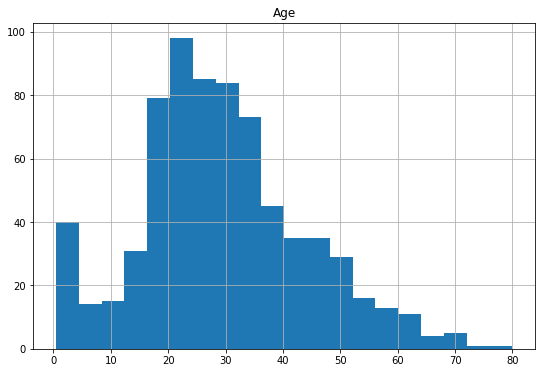

In [26]:
train.hist(column='Age', figsize=(9,6), bins=20)  

In [27]:
train["Age"] = train["Age"].fillna(train["Age"].median())

test["Age"] = test["Age"].fillna(test["Age"].median())

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000000008CE0898>]],
      dtype=object)

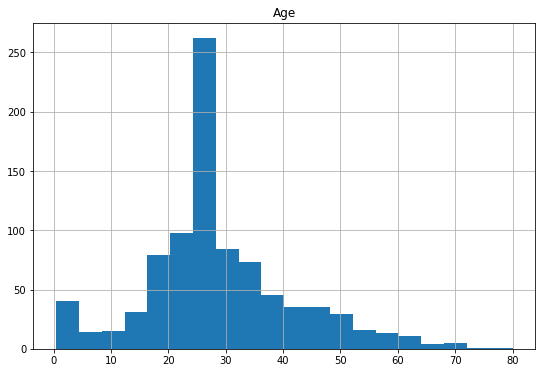

In [28]:
train.hist(column='Age',    # Column to plot
                   figsize=(9,6),   # Plot size
                   bins=20)         # Number of histogram bins

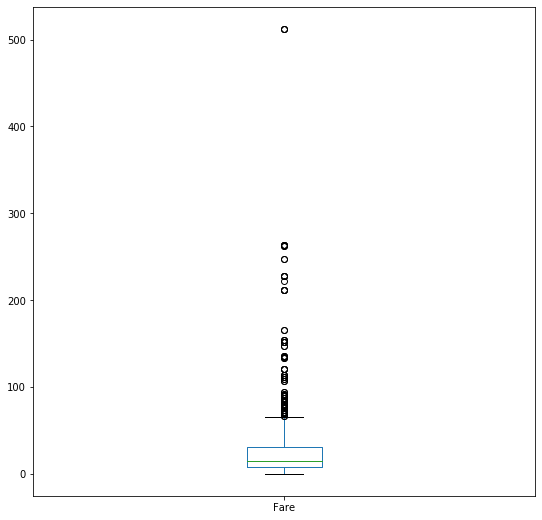

In [29]:
#Checking for Outliers

train["Fare"].plot(kind="box", figsize=(9,9))

In [30]:
train['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [31]:
#Impute the missing values with most common value

train["Embarked"] = train ["Embarked"].fillna("S")


test["Embarked"] = test["Embarked"].fillna("S")

In [32]:
#Feature Engineering

train["Family"] = train["SibSp"] + train["Parch"]

In [33]:
most_family = np.where(train["Family"] == max(train["Family"]))

train.iloc[most_family]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family
159,160,0,3,"Sage, Master. Thomas Henry",male,28.0,8,2,CA. 2343,69.55,n,S,10
180,181,0,3,"Sage, Miss. Constance Gladys",female,28.0,8,2,CA. 2343,69.55,n,S,10
201,202,0,3,"Sage, Mr. Frederick",male,28.0,8,2,CA. 2343,69.55,n,S,10
324,325,0,3,"Sage, Mr. George John Jr",male,28.0,8,2,CA. 2343,69.55,n,S,10
792,793,0,3,"Sage, Miss. Stella Anna",female,28.0,8,2,CA. 2343,69.55,n,S,10
846,847,0,3,"Sage, Mr. Douglas Bullen",male,28.0,8,2,CA. 2343,69.55,n,S,10
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,28.0,8,2,CA. 2343,69.55,n,S,10


In [34]:
#Convert the categorical variables into integers

train["Sex"][train["Sex"] == "male"] = 0
train["Sex"][train["Sex"] == "female"] = 1

test["Sex"][test["Sex"] == "male"] = 0
test["Sex"][test["Sex"] == "female"] = 1

C:\Users\DELL\Anaconda3\envs\DL_ENV\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\DELL\Anaconda3\envs\DL_ENV\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\DELL\Anaconda3\envs\DL_ENV\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_gu

In [35]:
train["Embarked"][train["Embarked"] == "S"] = 0
train["Embarked"][train["Embarked"] == "C"] = 1
train["Embarked"][train["Embarked"] == "Q"] = 2

test["Embarked"][test["Embarked"] == "S"] = 0
test["Embarked"][test["Embarked"] == "C"] = 1
test["Embarked"][test["Embarked"] == "Q"] = 2

C:\Users\DELL\Anaconda3\envs\DL_ENV\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\DELL\Anaconda3\envs\DL_ENV\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\DELL\Anaconda3\envs\DL_ENV\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate f

In [36]:
# Using Logistic Regression

from sklearn.linear_model import LogisticRegression


Y_target = train["Survived"].values
X_features_one = train[["Pclass", "Sex", "Age", "Fare"]].values
                               
logistic_model = LogisticRegression()
logistic_model.fit(X_features_one, Y_target)

# Print the Models Coefficients
print(logistic_model.coef_)



[[-1.02929839e+00  2.50906610e+00 -2.84360495e-02  1.55588270e-03]]


C:\Users\DELL\Anaconda3\envs\DL_ENV\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [37]:
print(logistic_model.classes_)

[0 1]


In [38]:
# Make predictions
y_preds = logistic_model.predict(X = X_features_one)

# Generate table of predictions vs actual
pd.crosstab(y_preds,train["Survived"])

Survived,0,1
row_0,,
0,469,102
1,80,240


In [43]:
# Accuracy

logistic_model.score(X = X_features_one ,
                y = train["Survived"])

0.7957351290684624

In [40]:
from sklearn import metrics 

# View confusion matrix
metrics.confusion_matrix(y_true=train["Survived"],  # True labels
                         y_pred=y_preds) # Predicted labels

array([[469,  80],
       [102, 240]], dtype=int64)

# Confusion Matrix

In [41]:
# View summary of common classification metrics
print(metrics.classification_report(y_true=train["Survived"],
                              y_pred=y_preds) )

              precision    recall  f1-score   support

           0       0.82      0.85      0.84       549
           1       0.75      0.70      0.73       342

    accuracy                           0.80       891
   macro avg       0.79      0.78      0.78       891
weighted avg       0.79      0.80      0.79       891



In [46]:
import pickle
pickle.dump(logistic_model, open('lLogistic_Regression_model.pkl', 'wb'))